# Visualize Landmodo Data

## Import libraries, csv files, etc for setup.

In [1]:
# Import libraries for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data cleaning and enriching file
from src.cleaning import*

# Plot settings
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# Import and check csv file
input_date = input_date() # test zip: 79847
df = pd.read_csv (f'output/landmodo_search_{input_date}.csv', encoding='latin') # take file with user input date
#Remove unnamed index column from csv
#df = df.set_index('Unnamed: 0')
#df.index.name = None
#df.sample(5)
df

Enter a date in the "YYYY-MM-DD" format to import a CSV from: 2022-07-26


,Zip Code,Location,State,Country,Parcel Size (acres),Parcel Price,Listing Name,Listing Author,Post Date
0,79847,Cornudas,TX,USA,20.18,18000.0,LAND FOR SALE â How to grow Old & Rich toget...,LandJakes,04/14/2022
1,79847,Cornudas,TX,USA,20.00,18000.0,Invest 20 Acres or Neighboring Lots in Cornuda...,LandJakes,03/04/2022
2,79847,Cornudas,TX,USA,20.00,18000.0,"Invest 20 Acres Land in Hudspeth County, TX. N...",LandJakes,03/04/2022
3,79847,Cornudas,TX,USA,20.00,20000.0,Summery Living in The Sunny Texas! Own 20 Acre...,LandJakes,03/04/2022
4,79847,Cornudas,TX,USA,20.00,18000.0,Invest 20 Acres or Neighboring Lots in Cornuda...,LandJakes,02/10/2022
5,79847,Cornudas,TX,USA,18.00,18000.0,"Invest 20 Acres Land in Hudspeth County, TX. N...",LandJakes,02/10/2022
6,79855,Van Horn,TX,USA,15.64,7500.0,"Van Horn, TX 79855",Auction Flippers LLC,06/06/2022
7,79855,Van Horn,TX,USA,11.00,5500.0,"Van Horn, TX 79855",Auction Flippers LLC,06/06/2022
8,79855,Van Horn,TX,USA,11.00,5500.0,"Van Horn, TX 79855",Auction Flippers LLC,06/06/2022
9,79855,Van Horn,TX,USA,11.00,5500.0,"Van Horn, TX 79855",Auction Flippers LLC,06/06/2022


## Format dataframes to work with visualization tools.

In [2]:
# Set Zip Code to string values
df.astype({'Zip Code': 'str'}).dtypes

# Create a new dataframe with average prices per acre for each zip code.
avg_df = avg_df(df)
avg_df

,Zip Code,Avg Acre Price
0,79847,930.783551
1,79855,655.749907
2,92301,5514.144272


## Parcel Price and Acreage by Zip Code

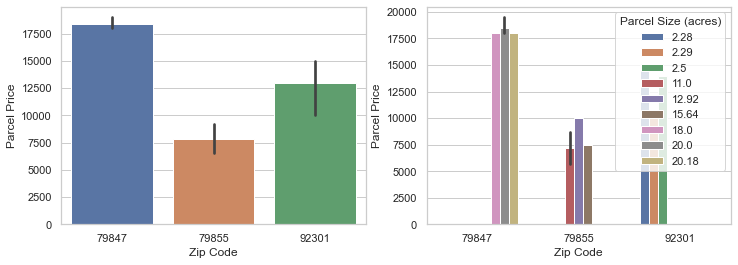

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

sns.barplot(data=df, x="Zip Code", y="Parcel Price", ax=axs[0])
sns.barplot(data=df, x="Zip Code", y="Parcel Price", hue="Parcel Size (acres)", ax=axs[1])
plt.show()
fig.figure.savefig(f"output/images/price_acreage_barcharts_{input_date}.png", dpi=1000)

## Price per Acre (Box Plot)

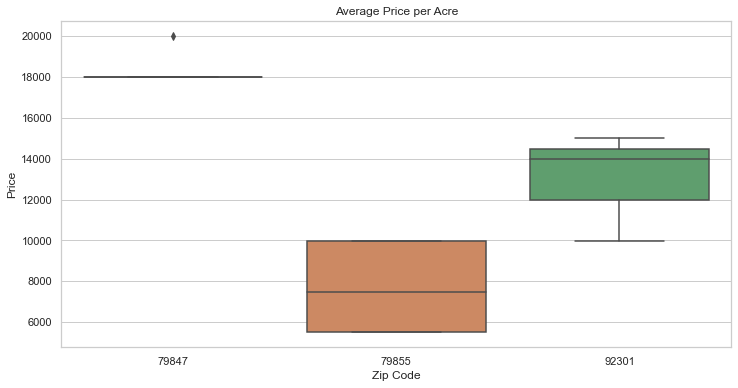

In [6]:
ax = plt.subplot()
sns.boxplot(x="Zip Code", y="Parcel Price", data=df)
ax.set(xlabel='Zip Code', ylabel='Price', title="Average Price per Acre")

fig.suptitle('Price per Acre')
fig.figure.savefig(f"output/images/price_per_acre_boxplot_{input_date}.png", dpi=1000)

## Average Price per Acre

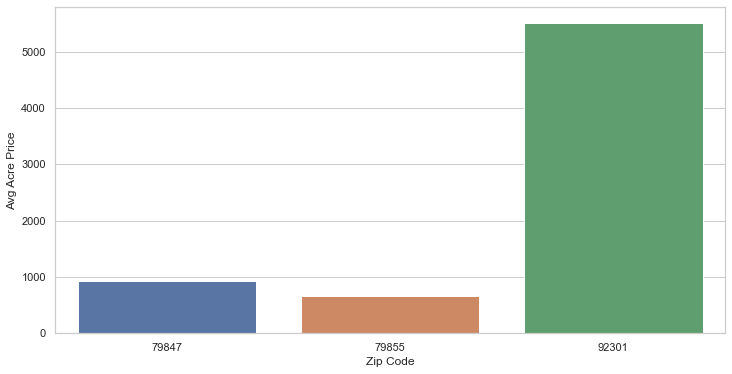

In [7]:
sns.barplot(data=avg_df, x="Zip Code", y="Avg Acre Price")
fig.suptitle('Average Price per Acre')
plt.show()
fig.figure.savefig(f"output/images/avg_price_per_acre_barchart_{input_date}.png", dpi=1000)

## Images have been exported to the "output" > "images" folder with the date included.